In [1]:
#dependencies
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [2]:
# Names of CSV files
# https://www.washingtonpost.com/graphics/2018/national/police-shootings-2018/?utm_term=.00d1b94c6b6c

file = "fatal-police-shootings-data.csv"
file2 = "004-Crime and Gun Statistics.csv"

In [3]:
# Import Officer Involved Shootings CSV
ois = pd.read_csv(file)
ois.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,1/2/2015,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,1/2/2015,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,1/3/2015,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,1/4/2015,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,1/4/2015,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [4]:
# remove columns
del ois['id']
del ois['manner_of_death']

#clean data of blankx#clean  
ois_clean = ois.dropna(how='any')
ois_clean.count()

name                       3000
date                       3000
armed                      3000
age                        3000
gender                     3000
race                       3000
city                       3000
state                      3000
signs_of_mental_illness    3000
threat_level               3000
flee                       3000
body_camera                3000
dtype: int64

In [5]:
#find types of armed 
ois_clean["gender"].value_counts()

M    2865
F     135
Name: gender, dtype: int64

In [6]:
ois_clean["armed"].unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'vehicle',
       'shovel', 'hammer', 'hatchet', 'undetermined', 'sword', 'machete',
       'box cutter', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'metal pole',
       'Taser', 'metal pipe', 'metal hand tool', 'blunt object',
       'metal stick', 'sharp object', 'meat cleaver', 'carjack', 'chain',
       "contractor's level", 'unknown weapon', 'stapler', 'crossbow',
       'bean-bag gun', 'baseball bat and fireplace poker',
       'straight edge razor', 'gun and knife', 'ax', 'brick',
       'baseball bat', 'hand torch', 'chain saw', 'garden tool',
       'scissors', 'pole', 'pick-axe', 'flashlight', 'spear', 'chair',
       'pitchfork', 'hatchet and gun', 'rock', 'piece of wood', 'bayonet',
       'glass shard', 'motorcycle', 'pepper spray', 'metal rake', 'baton',
       'crowbar', 'oar', 'machete and gun', 'air conditioner',
       'pole and knife', 'beer

In [7]:
# consolidate list of weapons in incidents located in "armed" column
ois_clean["armed"] = ois_clean["armed"].replace(
    { 'nail gun': 'other',
       'shovel': 'other', 'hammer': 'other', 'hatchet': 'other', 'sword': 'other',
       'box cutter': 'other', 'metal object': 'other', 'screwdriver': 'other', 'lawn mower blade': 'other',
       'flagpole': 'other', 'guns and explosives': 'other', 'cordless drill': 'other', 'metal pole': 'other',
       'Taser': 'other', 'metal pipe': 'other', 'metal hand tool': 'other', 'blunt object': 'other',
       'metal stick': 'other', 'sharp object': 'other', 'meat cleaver': 'knife', 'carjack': 'other', 'chain': 'other',
       "contractor's level": 'other', 'stapler': 'other', 'crossbow': 'other',
       'bean-bag gun': 'gun', 'baseball bat and fireplace poker': 'other',
       'straight edge razor': 'knife', 'gun and knife': 'other', 'ax': 'other', 'brick': 'other',
       'baseball bat': 'other', 'hand torch': 'other', 'chain saw': 'other', 'garden tool': 'other',
       'scissors': 'knife', 'pole': 'other', 'pick-axe': 'other', 'flashlight': 'other', 'spear': 'other', 'chair': 'other',
       'pitchfork': 'other', 'hatchet and gun': 'other', 'rock': 'other', 'piece of wood': 'other', 'bayonet': 'knife',
       'glass shard': 'other', 'motorcycle': 'vehicle', 'pepper spray': 'other', 'metal rake': 'other', 'baton': 'other',
       'crowbar': 'other', 'oar': 'other', 'machete and gun': 'other', 'air conditioner': 'other',
       'pole and knife': 'other', 'beer bottle': 'other', 'pipe': 'other', 'baseball bat and bottle': 'other',
       'fireworks': 'other', 'pen': 'other', 'chainsaw': 'other', 'gun and sword': 'other', 'gun and car': 'other',
       'pellet gun': 'gun', 'BB gun': 'gun', 'incendiary device': 'other', 'machete': 'knife', 'unknown weapon': 'other',
        'undetermined': 'other'})
ois_clean["armed"].value_counts()

C:\Users\astor\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


gun           1678
knife          463
other          298
unarmed        232
vehicle        211
toy weapon     118
Name: armed, dtype: int64

In [8]:
#output clean CSV
ois_clean.to_csv("ois_clean.csv")

In [9]:
#state abbeviations dictionary
state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [10]:
# import clean csv
wapo=pd.read_csv("ois_clean.csv")
wapo.head()

,Unnamed: 0,name,date,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,0,Tim Elliot,1/2/2015,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,1,Lewis Lee Lembke,1/2/2015,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,2,John Paul Quintero,1/3/2015,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,3,Matthew Hoffman,1/4/2015,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,4,Michael Rodriguez,1/4/2015,other,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [11]:
# import csv of US census regions/divisions from:
# (https://github.com/cphalpert/census-regions/blob/master/us%20census%20bureau%20regions%20and%20divisions.csv)
regions=pd.read_csv("us census bureau regions and divisions.csv")
regions=regions.drop(regions.index[7])
regions=regions.drop(columns="State")
regions=regions.rename(columns={"State Code": "State"})
regions


,State,Region,Division
0,AK,West,Pacific
1,AL,South,East South Central
2,AR,South,West South Central
3,AZ,West,Mountain
4,CA,West,Pacific
5,CO,West,Mountain
6,CT,Northeast,New England
8,DE,South,South Atlantic
9,FL,South,South Atlantic
10,GA,South,South Atlantic


In [12]:
# create dataframe of incidents per state
armed_df=wapo[["state", "armed"]]
armed_df=armed_df.rename(columns={"state":"State", "armed":"Armed"})
state_counts=armed_df.groupby("State").count()
state_counts=state_counts.reset_index(drop=False)

state_counts.head()

,State,Armed
0,AK,19
1,AL,63
2,AR,31
3,AZ,143
4,CA,463


In [13]:
# create dataframe of incidents by deceased armed vs. unarmed and weapons involved
weapon_counts=armed_df.groupby("Armed").count()
weapon_counts=weapon_counts.reset_index(drop=False)
weapon_counts=weapon_counts.rename(columns={"State":"Incidents"})
weapon_counts

,Armed,Incidents
0,gun,1678
1,knife,463
2,other,298
3,toy weapon,118
4,unarmed,232
5,vehicle,211


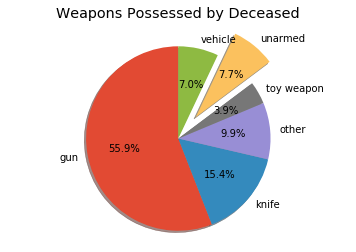

In [14]:
# create pie chart of deceased civilian weapons
labels=weapon_counts["Armed"]
explode=(0,0,0,0,0.3,0)
plt.pie(weapon_counts["Incidents"], startangle=90, labels=labels, explode=explode, autopct = "%1.1f%%", shadow=True)
plt.title("Weapons Possessed by Deceased")
plt.axis("Equal")
plt.figure(figsize=(20,20))
plt.savefig("weapons.png")

In [15]:
# api call for population below poverty level by state
from config import api_key
url = "https://api.census.gov/data/2016/acs/acs1?get=NAME,B01003_001E,B17001_002E&for=state:*&key="
query_url= url + api_key
census_data = requests.get(query_url).json()

In [16]:
# create dataframe from api data o poverty, drop header, D.C. and Puerto Rico
poverty_df = pd.DataFrame(census_data, columns= ["State Name", "Estimated Population", "Below Poverty Level", "State ID"])
poverty_df=poverty_df.drop(poverty_df.index[[0, 9, 52]])
poverty_df=poverty_df.reset_index(drop=True)
poverty_df.head()

,State Name,Estimated Population,Below Poverty Level,State ID
0,Alabama,4863300,810231,01
1,Alaska,741894,71566,02
2,Arizona,6931071,1107464,04
3,Arkansas,2988248,499225,05
4,California,39250017,5525524,06


In [17]:
# convert objects to integers
poverty_df["Est Pop"] = poverty_df["Estimated Population"].astype("int") 
poverty_df["Below Poverty Level"] = poverty_df["Below Poverty Level"].astype("int") 
# convert total to percent
poverty_df["% Below Poverty Level"]=poverty_df["Below Poverty Level"] / poverty_df["Est Pop"] * 100
# Map state full names to abbreviations
poverty_df["State"]=poverty_df["State Name"].map(state_abbrev)
poverty_df=poverty_df[["State", "% Below Poverty Level", "Est Pop"]]

merged_poverty=pd.merge(poverty_df, state_counts, how="inner", on="State")
merged_poverty=merged_poverty.rename(columns={"Armed":"Incidents"})
merged_poverty["Incidents Per 100k People"]=merged_poverty["Incidents"] / (merged_poverty["Est Pop"] / 100000)
merged_poverty=pd.merge(merged_poverty, regions, how="inner", on="State")
merged_poverty

,State,% Below Poverty Level,Est Pop,Incidents,Incidents Per 100k People,Region,Division
0,AL,16.660107,4863300,63,1.295417,South,East South Central
1,AK,9.646392,741894,19,2.561013,West,Pacific
2,AZ,15.978252,6931071,143,2.063173,West,Mountain
3,AR,16.706277,2988248,31,1.037397,South,West South Central
4,CA,14.077762,39250017,463,1.179617,West,Pacific
5,CO,10.806446,5540545,90,1.624389,West,Mountain
6,CT,9.482247,3576452,10,0.279607,Northeast,New England
7,DE,11.365926,952065,9,0.945314,South,South Atlantic
8,FL,14.425813,20612439,189,0.916922,South,South Atlantic
9,GA,15.547578,10310371,90,0.872907,South,South Atlantic


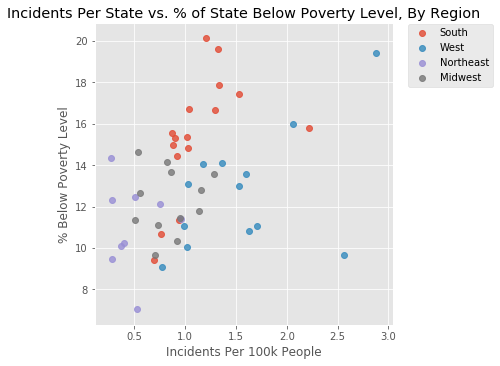

In [18]:
sns.lmplot( x="Incidents Per 100k People", y="% Below Poverty Level", data=merged_poverty, fit_reg=False, hue="Region", legend=False)
plt.title("Incidents Per State vs. % of State Below Poverty Level, By Region")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("povlevel-region.png")

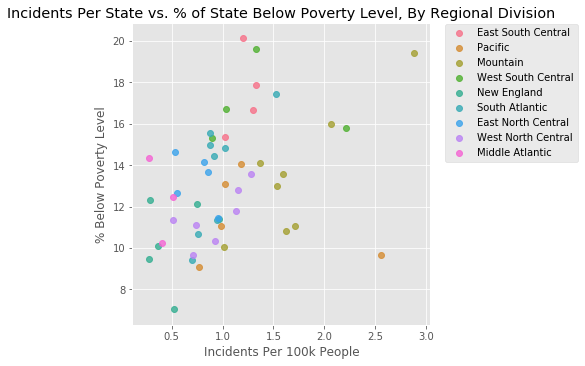

In [19]:
sns.lmplot( x="Incidents Per 100k People", y="% Below Poverty Level", data=merged_poverty, fit_reg=False, hue="Division", legend=False)
plt.title("Incidents Per State vs. % of State Below Poverty Level, By Regional Division")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("povlevel-division.png")

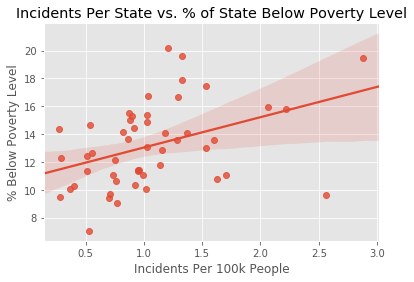

In [20]:
sns.regplot(x="Incidents Per 100k People", y="% Below Poverty Level", data=merged_poverty)
plt.title("Incidents Per State vs. % of State Below Poverty Level")
plt.savefig("povlevel-regression.png")


In [21]:
# api call from census for population by race listed per state
race_criteria="B01003_001E,B03002_003E,B03002_004E,B03002_005E,B03002_006E,B03002_007E,B03002_008E,B03002_009E,B03002_012E,B03002_002E"
race_url = f"https://api.census.gov/data/2016/acs/acs1?get=NAME,{race_criteria}&for=state:*&key="
race_query= race_url + api_key
race_data = requests.get(race_query).json()

In [22]:
race_df = pd.DataFrame(race_data, columns= ["State Name","Total Population","White alone","Black or African American alone",
                                            "American Indian and Alaska Native alone","Asian alone",
                                            "Native Hawaiian and Other Pacific Islander alone","Some other race alone",
                                            "Two or more races","Hispanic or Latino","Not Hispanic or Latino","State ID"])


race_df=race_df.drop(race_df.index[[0,9,52]])
race_df=race_df.reset_index(drop=True)
race_df

,State Name,Total Population,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Hispanic or Latino,Not Hispanic or Latino,State ID
0,Alabama,4863300,3197147,1294572,21225,65100,1341,7537,76692,199686,4663614,01
1,Alaska,741894,452757,21768,104362,44235,9766,1741,55961,51304,690590,02
2,Arizona,6931071,3834724,284478,274472,214132,12834,10072,155584,2144775,4786296,04
3,Arkansas,2988248,2175226,462232,16096,41387,8808,2917,67038,214544,2773704,05
4,California,39250017,14725729,2160958,132153,5518226,137019,105389,1189767,15280776,23969241,06
5,Colorado,5540545,3796733,220728,28993,173588,7397,6313,125575,1181218,4359327,08
6,Connecticut,3576452,2411769,352345,4968,159838,505,11451,73229,562347,3014105,09
7,Delaware,952065,597331,203278,3281,35591,990,1419,23023,87152,864913,10
8,Florida,20612439,11271384,3162469,38654,550606,10290,70928,381530,5126578,15485861,12
9,Georgia,10310371,5484889,3205543,17417,396429,5134,32116,206509,962334,9348037,13


In [23]:
total_criteria="B01003_001E,B03002_003E,B03002_004E,B03002_005E,B03002_006E,B03002_007E,B03002_008E,B03002_009E,B03002_012E,B03002_002E"
total_race_url = f"https://api.census.gov/data/2016/acs/acs1?get={total_criteria}&for=US:1&key="
total_query= total_race_url + api_key
total_data = requests.get(total_query).json()

total_df = pd.DataFrame(total_data, columns= ["Total Population","White alone","Black or African American alone",
                                            "American Indian and Alaska Native alone","Asian alone",
                                            "Native Hawaiian and Other Pacific Islander alone","Some other race alone",
                                            "Two or more races","Hispanic or Latino","Not Hispanic or Latino", "Index"])


total_df=total_df.drop(race_df.index[[0]])
del total_df["Total Population"]
del total_df["Index"]
del total_df["Two or more races"]
del total_df["Not Hispanic or Latino"]

total_df["White alone"] = total_df["White alone"].astype("float")
total_df["Black or African American alone"] = total_df["Black or African American alone"].astype("int")
total_df["American Indian and Alaska Native alone"] = total_df["American Indian and Alaska Native alone"].astype("int")
total_df["Asian alone"] = total_df["Asian alone"].astype("int")
total_df["Native Hawaiian and Other Pacific Islander alone"] = total_df["Native Hawaiian and Other Pacific Islander alone"].astype("int")
total_df["Hispanic or Latino"] = total_df["Hispanic or Latino"].astype("int")
total_df["Some other race alone"] = total_df["Some other race alone"].astype("int")
total_df["Other"]=total_df["Native Hawaiian and Other Pacific Islander alone"] + total_df["Some other race alone"]

del total_df["Native Hawaiian and Other Pacific Islander alone"]
del total_df["Some other race alone"]

total_df=total_df.stack()
total_df.head()

1  White alone                                197479450.0
   Black or African American alone             39717127.0
   American Indian and Alaska Native alone      2125635.0
   Asian alone                                 17345193.0
   Hispanic or Latino                          57398719.0
dtype: float64

In [24]:
# calculate diversity index as defined by UNC and USA Today: https://www.unc.edu/~pmeyer/carstat/tools.html

#convert objects to integers
race_df["TP"] = race_df["Total Population"].astype("int")
race_df["W"] = race_df["White alone"].astype("int")
race_df["B"] = race_df["Black or African American alone"].astype("int")
race_df["AI"] = race_df["American Indian and Alaska Native alone"].astype("int")
race_df["A"] = race_df["Asian alone"].astype("int")
race_df["PI"] = race_df["Native Hawaiian and Other Pacific Islander alone"].astype("int")
race_df["H"] = race_df["Hispanic or Latino"].astype("int")
race_df["NH"] = race_df["Not Hispanic or Latino"].astype("int")

diversity_index=[]
for index, row in race_df.iterrows():
    # convert totals to percentage of total pop
    row["W"]=row["W"]/row["TP"]
    row["B"]=row["B"]/row["TP"]
    row["AI"]=row["AI"]/row["TP"]
    row["A"]=row["A"]/row["TP"]
    row["PI"]=row["PI"]/row["TP"]
    row["H"]=row["H"]/row["TP"]
    row["NH"]=row["NH"]/row["TP"]
    #calculate index
    diversity_calc = (1-((row["W"]**2 + row["B"]**2 + row["AI"]**2 + row["A"]**2 + row["PI"]**2) * 
                          (row["H"]**2 + row ["NH"]**2))) * 100
    
    diversity_index.append(diversity_calc)

diversity_df=pd.DataFrame({"State":merged_poverty["State"],"Diversity":diversity_index, "Incidents/100k":merged_poverty["Incidents Per 100k People"]})
diversity_df["Diversity"]=diversity_df["Diversity"].round(3)

diversity_df

,Diversity,Incidents/100k,State
0,53.639,1.295417,AL
1,65.428,2.561013,AK
2,82.231,2.063173,AZ
3,51.981,1.037397,AR
4,91.420,1.179617,CA
5,68.623,1.624389,CO
6,65.717,0.279607,CT
7,63.265,0.945314,DE
8,79.754,0.916922,FL
9,68.336,0.872907,GA


Text(0,0.5,'Diversity Index of State')

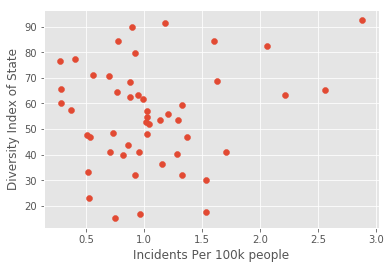

In [25]:
plt.scatter(diversity_df["Incidents/100k"], diversity_df["Diversity"])
plt.xlabel("Incidents Per 100k people")
plt.ylabel("Diversity Index of State")

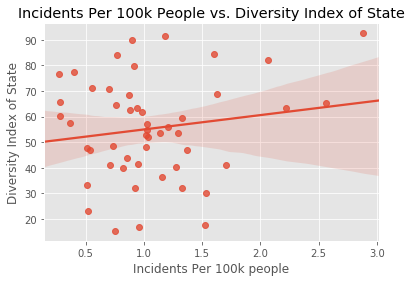

In [26]:
sns.regplot(x="Incidents/100k", y="Diversity", data=diversity_df)
plt.xlabel("Incidents Per 100k people")
plt.ylabel("Diversity Index of State")
plt.title("Incidents Per 100k People vs. Diversity Index of State")
plt.savefig("divindex-regression.png")

In [27]:
gun_stats = pd.read_csv(file2)
gun_stats.head()

,State Name,Gun Murder Rate per 100K (2010),Gun Ownership (2007),"Violent Crime (per 100,000) 2013",Murder and nonnegligent manslaughter (per 100K) 2013,Forcible rape (per 100K) 2013,Robbery (per 100K) 2013,Aggravated assault (per 100K) 2013,Property Crime (per 100K) 2013,Burglary (per 100K) 2013,Larceny (per 100K) 2013,Motor Theft (per 100K) 2013
0,Alabama,2.8,51.70%,449.9,7.1,26.9,104.1,311.8,3502.2,984.7,2312.8,204.8
1,Alaska,2.7,57.80%,603.2,4.1,79.7,86.1,433.2,2739.4,403.3,2128.0,208.1
2,Arizona,3.6,31.10%,428.9,5.5,34.7,112.7,276.0,3539.2,807.8,2439.1,292.3
3,Arkansas,3.2,55.30%,469.1,5.9,42.3,78.7,342.3,3660.1,1081.3,2384.7,194.1
4,California,3.4,21.30%,423.1,5.0,20.6,148.6,248.9,2758.7,646.1,1669.5,443.2


In [28]:
#gun_stats=gun_stats['Gun Ownership (2007)'].astype('float')#gun_st 
gun_stats["Gun Ownership (2007)"] = gun_stats["Gun Ownership (2007)"].replace({'\%':''}, regex = True)
gun_stats.head()

,State Name,Gun Murder Rate per 100K (2010),Gun Ownership (2007),"Violent Crime (per 100,000) 2013",Murder and nonnegligent manslaughter (per 100K) 2013,Forcible rape (per 100K) 2013,Robbery (per 100K) 2013,Aggravated assault (per 100K) 2013,Property Crime (per 100K) 2013,Burglary (per 100K) 2013,Larceny (per 100K) 2013,Motor Theft (per 100K) 2013
0,Alabama,2.8,51.70,449.9,7.1,26.9,104.1,311.8,3502.2,984.7,2312.8,204.8
1,Alaska,2.7,57.80,603.2,4.1,79.7,86.1,433.2,2739.4,403.3,2128.0,208.1
2,Arizona,3.6,31.10,428.9,5.5,34.7,112.7,276.0,3539.2,807.8,2439.1,292.3
3,Arkansas,3.2,55.30,469.1,5.9,42.3,78.7,342.3,3660.1,1081.3,2384.7,194.1
4,California,3.4,21.30,423.1,5.0,20.6,148.6,248.9,2758.7,646.1,1669.5,443.2


In [29]:
gun= gun_stats.rename(columns={"Gun Ownership (2007)":"Gun Ownership",'Violent Crime  (per 100,000) 2013':"Violent Crime" })
gun.head(50)

,State Name,Gun Murder Rate per 100K (2010),Gun Ownership,Violent Crime,Murder and nonnegligent manslaughter (per 100K) 2013,Forcible rape (per 100K) 2013,Robbery (per 100K) 2013,Aggravated assault (per 100K) 2013,Property Crime (per 100K) 2013,Burglary (per 100K) 2013,Larceny (per 100K) 2013,Motor Theft (per 100K) 2013
0,Alabama,2.8,51.70,449.9,7.1,26.9,104.1,311.8,3502.2,984.7,2312.8,204.8
1,Alaska,2.7,57.80,603.2,4.1,79.7,86.1,433.2,2739.4,403.3,2128.0,208.1
2,Arizona,3.6,31.10,428.9,5.5,34.7,112.7,276.0,3539.2,807.8,2439.1,292.3
3,Arkansas,3.2,55.30,469.1,5.9,42.3,78.7,342.3,3660.1,1081.3,2384.7,194.1
4,California,3.4,21.30,423.1,5.0,20.6,148.6,248.9,2758.7,646.1,1669.5,443.2
5,Colorado,1.3,34.70,308.9,3.1,40.7,65.4,199.6,2684.7,504.2,1947.4,233.1
6,Connecticut,2.7,16.70,283.0,4.1,25.6,102.7,150.6,2140.0,409.7,1550.7,179.6
7,Delaware,4.2,25.50,547.4,6.2,26.5,162.7,352.0,3340.9,803.7,2380.6,156.6
8,District of Columbia,16.5,3.60,1243.7,13.9,37.3,638.3,554.1,4860.8,556.5,3725.3,579.0
9,Florida,3.9,24.50,487.1,5.2,27.2,123.7,330.9,3276.7,794.9,2288.6,193.2


In [30]:
gun['Gun Ownership'] = gun['Gun Ownership'].astype('float')

In [31]:
oisdata = pd.read_csv(file)
oisdata.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,1/2/2015,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,1/2/2015,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,1/3/2015,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,1/4/2015,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,1/4/2015,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [32]:
gb_oisdata = oisdata.groupby("state").count()
gb_oisdata.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,signs_of_mental_illness,threat_level,flee,body_camera
state,,,,,,,,,,,,,
AK,22,22,22,22,22,22,22,19,22,22,22,22,22
AL,73,73,73,73,73,69,73,64,73,73,73,72,73
AR,40,40,40,40,40,40,40,33,40,40,40,37,40
AZ,169,169,169,169,169,162,169,147,169,169,169,164,169
CA,543,543,543,543,542,516,542,484,543,543,543,530,543


In [33]:
np.corrcoef(gun['Violent Crime'], gb_oisdata['name'])

array([[1.       , 0.0770752],
       [0.0770752, 1.       ]])

In [34]:
gun["State"]=gun["State Name"].map(state_abbrev)
gun.head()

,State Name,Gun Murder Rate per 100K (2010),Gun Ownership,Violent Crime,Murder and nonnegligent manslaughter (per 100K) 2013,Forcible rape (per 100K) 2013,Robbery (per 100K) 2013,Aggravated assault (per 100K) 2013,Property Crime (per 100K) 2013,Burglary (per 100K) 2013,Larceny (per 100K) 2013,Motor Theft (per 100K) 2013,State
0,Alabama,2.8,51.7,449.9,7.1,26.9,104.1,311.8,3502.2,984.7,2312.8,204.8,AL
1,Alaska,2.7,57.8,603.2,4.1,79.7,86.1,433.2,2739.4,403.3,2128.0,208.1,AK
2,Arizona,3.6,31.1,428.9,5.5,34.7,112.7,276.0,3539.2,807.8,2439.1,292.3,AZ
3,Arkansas,3.2,55.3,469.1,5.9,42.3,78.7,342.3,3660.1,1081.3,2384.7,194.1,AR
4,California,3.4,21.3,423.1,5.0,20.6,148.6,248.9,2758.7,646.1,1669.5,443.2,CA


In [35]:
new_merge=pd.merge(merged_poverty, gun, how="left", on="State")
new_merge.head()
new_merge.to_csv("new merge.csv")

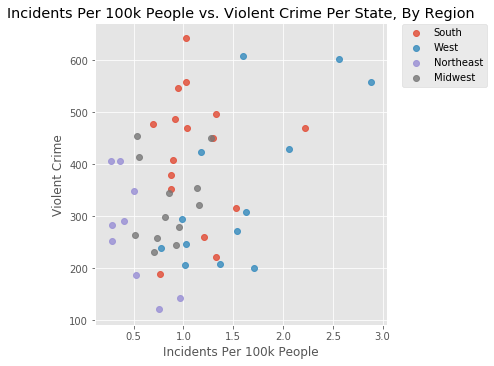

In [36]:
sns.lmplot(x="Incidents Per 100k People", y="Violent Crime", data=new_merge, fit_reg=False, hue="Region", legend=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Incidents Per 100k People vs. Violent Crime Per State, By Region")
plt.savefig("violent-region.png")

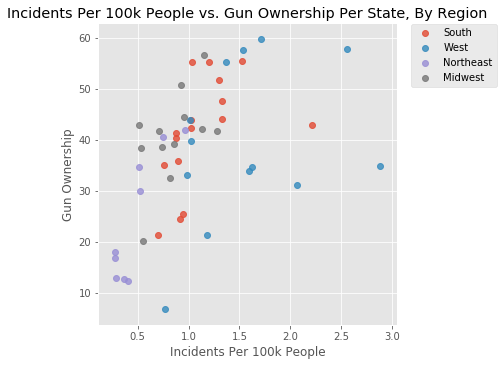

In [37]:
sns.lmplot(x="Incidents Per 100k People", y="Gun Ownership", data=new_merge, fit_reg=False, hue="Region", legend=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Incidents Per 100k People vs. Gun Ownership Per State, By Region")
plt.savefig("gunowner-region.png")

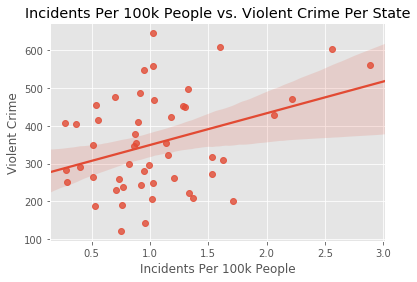

In [38]:
sns.regplot(x="Incidents Per 100k People", y="Violent Crime", data=new_merge)
plt.title("Incidents Per 100k People vs. Violent Crime Per State")
plt.savefig("violent-regression.png")

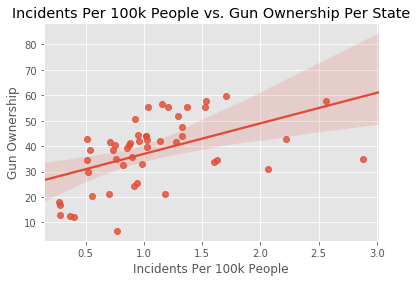

In [39]:
sns.regplot(x="Incidents Per 100k People", y="Gun Ownership", data=new_merge)
plt.title("Incidents Per 100k People vs. Gun Ownership Per State")
plt.savefig("gunowner-regression.png")

In [40]:
race_keys = wapo["race"].value_counts().keys()
print(race_keys)
list(race_keys)
race_values = wapo["race"].value_counts().values
race_values
type(race_values)

Index(['W', 'B', 'H', 'N', 'A', 'O'], dtype='object')


numpy.ndarray

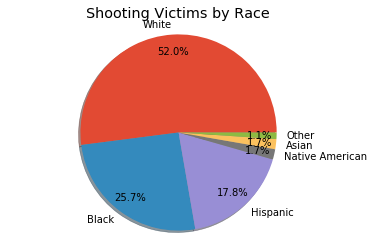

In [41]:
# deceased by race

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
#
labels = ["White", "Black", "Hispanic", "Native American", "Asian", "Other"]
sizes = list(race_values)


fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0, pctdistance=.83)
    
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Shooting Victims by Race")
plt.savefig("incidents-race-pie.png")
plt.show()

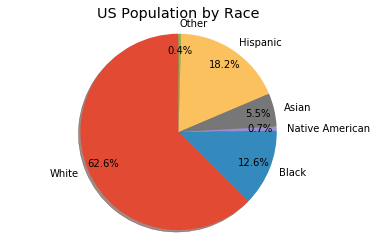

In [42]:
# total population by race 
labels = ["White", "Black", "Native American", "Asian", "Hispanic", "Other"]

fig1, ax1 = plt.subplots()
ax1.pie(total_df,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, pctdistance=.83)
    
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("US Population by Race")
plt.savefig("us-race-pie.png")
plt.show()

In [43]:
#read in csv
MedianIncome_df = pd.read_csv("StateMedianIncome.csv")
MedianIncome_df.head()

,GEO.id,GEO.id2,GEO.display-label,GCT_STUB.target-geo-id,GCT_STUB.target-geo-id2,GCT_STUB.display-label,GCT_STUB.display-label.1,HC01,HC02
0,Id,Id2,Geography,Target Geo Id,Target Geo Id2,Geographic Area,Geographic Area,Dollar,Margin of Error
1,0100000US,NaN,United States,0100000US,NaN,United States,United States,67871,212
2,0100000US,NaN,United States,0400000US01,1,United States - Alabama,Alabama,56828,414
3,0100000US,NaN,United States,0400000US02,2,United States - Alaska,Alaska,87365,1180
4,0100000US,NaN,United States,0400000US04,4,United States - Arizona,Arizona,61001,314


In [44]:
MedianIncome_df1 = MedianIncome_df[["GCT_STUB.display-label.1", "HC01", ]]
MedianIncome_df1.head(10)

,GCT_STUB.display-label.1,HC01
0,Geographic Area,Dollar
1,United States,67871
2,Alabama,56828
3,Alaska,87365
4,Arizona,61001
5,Arkansas,53123
6,California,72952
7,Colorado,77130
8,Connecticut,91274
9,Delaware,73831


In [45]:
CleanMedianIncome_df = MedianIncome_df1.rename(columns={"GCT_STUB.display-label.1": "State Name", "HC01": "Median Income"})
CleanMedianIncome_df.head(10)

,State Name,Median Income
0,Geographic Area,Dollar
1,United States,67871
2,Alabama,56828
3,Alaska,87365
4,Arizona,61001
5,Arkansas,53123
6,California,72952
7,Colorado,77130
8,Connecticut,91274
9,Delaware,73831


In [46]:
CleanMedianIncome_df1 = CleanMedianIncome_df.drop(CleanMedianIncome_df.index[[0,1,10,53]])
CleanMedianIncome_df1

,State Name,Median Income
2,Alabama,56828
3,Alaska,87365
4,Arizona,61001
5,Arkansas,53123
6,California,72952
7,Colorado,77130
8,Connecticut,91274
9,Delaware,73831
11,Florida,59139
12,Georgia,61328


In [47]:
CleanMedianIncome_df1["State"]=CleanMedianIncome_df1["State Name"].map(state_abbrev)
CleanMedianIncome_df1

,State Name,Median Income,State
2,Alabama,56828,AL
3,Alaska,87365,AK
4,Arizona,61001,AZ
5,Arkansas,53123,AR
6,California,72952,CA
7,Colorado,77130,CO
8,Connecticut,91274,CT
9,Delaware,73831,DE
11,Florida,59139,FL
12,Georgia,61328,GA


In [48]:
income_merge=pd.merge(CleanMedianIncome_df1, merged_poverty, how="left", on="State")
income_merge.head()

,State Name,Median Income,State,% Below Poverty Level,Est Pop,Incidents,Incidents Per 100k People,Region,Division
0,Alabama,56828,AL,16.660107,4863300,63,1.295417,South,East South Central
1,Alaska,87365,AK,9.646392,741894,19,2.561013,West,Pacific
2,Arizona,61001,AZ,15.978252,6931071,143,2.063173,West,Mountain
3,Arkansas,53123,AR,16.706277,2988248,31,1.037397,South,West South Central
4,California,72952,CA,14.077762,39250017,463,1.179617,West,Pacific


In [49]:
income_merge["Median Income"]=income_merge["Median Income"].astype("int")

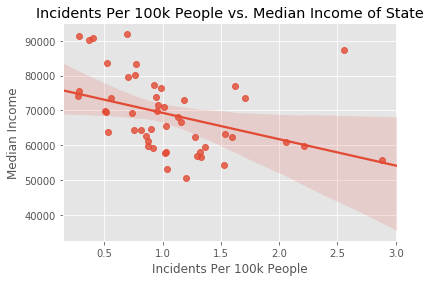

In [50]:
sns.regplot(x="Incidents Per 100k People", y="Median Income", data=income_merge)
plt.title("Incidents Per 100k People vs. Median Income of State")
plt.savefig("incidents-income-regression.png")